In [ ]:
%pip install scikit-learn
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix


  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl (8.7 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Load Dataset

In [ ]:
df_raw = pd.read_csv("diabetes.csv")  # Kaggle UCI Pima dataset

print(df_raw.head())
print(df_raw.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Data Cleaning

In [ ]:
df = df_raw.copy()

cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_invalid:
    df[col] = df[col].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Univariate Analysis

In [ ]:
from scipy.stats import skew, kurtosis

def univariate_analysis(data):
    result = pd.DataFrame(columns=["Mean","Median","Mode","Variance",
                                   "Std Dev","Skewness","Kurtosis"])
    
    for col in data.columns:
        if col != "Outcome":
            result.loc[col] = [
                data[col].mean(),
                data[col].median(),
                data[col].mode()[0],
                data[col].var(),
                data[col].std(),
                skew(data[col]),
                kurtosis(data[col])
            ]
    return result

uni_results_raw = univariate_analysis(df_raw)
uni_results_clean = univariate_analysis(df)

print("Raw Dataset Statistics:")
print(uni_results_raw)

print("\nCleaned Dataset Statistics:")
print(uni_results_clean)

Raw Dataset Statistics:
                                Mean    Median    Mode      Variance  \
Pregnancies                 3.845052    3.0000   1.000     11.354056   
Glucose                   120.894531  117.0000  99.000   1022.248314   
BloodPressure              69.105469   72.0000  70.000    374.647271   
SkinThickness              20.536458   23.0000   0.000    254.473245   
Insulin                    79.799479   30.5000   0.000  13281.180078   
BMI                        31.992578   32.0000  32.000     62.159984   
DiabetesPedigreeFunction    0.471876    0.3725   0.254      0.109779   
Age                        33.240885   29.0000  22.000    138.303046   

                             Std Dev  Skewness  Kurtosis  
Pregnancies                 3.369578  0.899912  0.150383  
Glucose                    31.972618  0.173414  0.628813  
BloodPressure              19.355807 -1.840005  5.138691  
SkinThickness              15.952218  0.109159 -0.524494  
Insulin                   115.24

In [ ]:
print("Outcome Frequency (Raw):")
print(df_raw["Outcome"].value_counts())

print("\nOutcome Frequency (Cleaned):")
print(df["Outcome"].value_counts())

Outcome Frequency (Raw):
Outcome
0    500
1    268
Name: count, dtype: int64

Outcome Frequency (Cleaned):
Outcome
0    500
1    268
Name: count, dtype: int64


Visualization

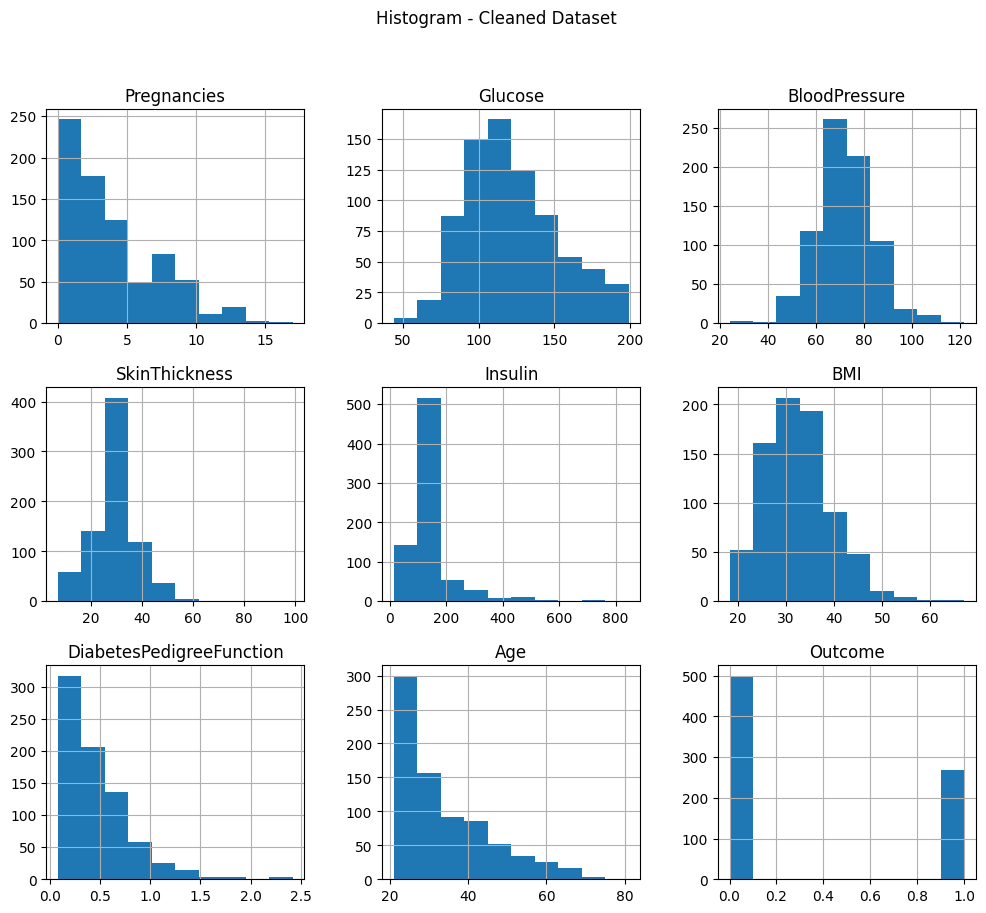

NameError: name 'sns' is not defined

In [ ]:
df.hist(figsize=(12,10))
plt.suptitle("Histogram - Cleaned Dataset")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X_lin = df[['BMI']]
y_lin = df['Glucose']

lin_model = LinearRegression()
lin_model.fit(X_lin, y_lin)

print("Linear Regression Coefficient:", lin_model.coef_)
print("Intercept:", lin_model.intercept_)
print("R² Score:", lin_model.score(X_lin, y_lin))